# Assignment: Diamond Price Prediction (Clustering and Fitting)

#### **Name: Muhammad Akmal**
#### **Student ID: 23087309**
#### **Subject: Applied Data Science:1**



#### **This Data is taken from following: [[link](https://www.kaggle.com/datasets/shivam2503/diamonds)]**

----

### **Loading the libraries**

In [7]:
# loading the libraries

# general libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# statistical libraries
from scipy import stats

# preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [9]:
# loading the dataset
df = pd.read_csv('data.csv')

# previewing the dataset
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


---

As we can see that the column name `Unnamed: 0` just replicates the index, so we can drop it.

----

In [10]:
# dropping the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

### **Column Description**

| column name | description |
| --- | --- |
| carat | weight of the diamond measured in carats|
| cut | quality of the cut|
| color | color of the diamond in many hues (J-> worst) and (D-> Best)|
| clarity | internal characteristics of the diamond (I1-> worst) and (IF-> Best)|
| depth | It is length from the lower bottom of the diamond to the top flat surface|
| table | It is the width of the top flat surface of the diamond|
| price | price of the diamond in US dollars|
| x | length in mm|
| y | width in mm|
| z | depth in mm|



In [5]:
# given column the meaningful name
df.rename(columns={
    'x': 'length',
    'y': 'width',
    'z': 'height'
}, inplace=True)

### **Getting Know about the dataset**

In [1001]:
# checking the no. of rows and columns
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 53940 rows and 10 columns


In [1002]:
# # check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   height   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [1003]:
# # check for datatypes
print("The data type of each column is:")
df.dtypes

The data type of each column is:


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
length     float64
width      float64
height     float64
dtype: object

### **Descriptive Statistics**

In [1004]:
# Get descriptive statistics for the DataFrame
df.describe()

,carat,depth,table,price,length,width,height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


---

- Average `carat` weight of the diamond in our dataset is 0.79 carats and the standard deviation is 0.47 carats.
- The mean `depth` is 61.75 mm and the standard deviation is 1.43 mm.
- The mean `table` width is 57.46 mm and the standard deviation is 2.23 mm.
- The mean `price` of the diamond in our dataset is 3932.75 US dollars and the standard deviation is quite large which is 3989.43 US dollars.
- On an average the mean length and width of the diamond in our dataset is 5.73.
- Whereas, the average `height` is 3.53

---

#### **Skewness**

In [1005]:
# checking skewness

# loop through each column
for col in df.columns:
    # setting a condition to select only the numeric columns
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        # printing the skewness of numeroc column
        print(f"The skewness of '{col}' is: '{stats.skew(df[col]).round(2)}'")

The skewness of 'carat' is: '1.12'
The skewness of 'depth' is: '-0.08'
The skewness of 'table' is: '0.8'
The skewness of 'price' is: '1.62'
The skewness of 'length' is: '0.38'
The skewness of 'width' is: '2.43'
The skewness of 'height' is: '1.52'


----

- As we know that if:

  - Skewness > 0: Data is positively (right) skewed.
  - Skewness < 0: Data is negatively (left) skewed.
  - Skewness = 0: Data is symmetric

- In our dataset `carat` column has skewness value 1.12 that means it is right skewed.
- Moreover, the columns price, height and width columns are also right skewed.
- Whereas, the `depth and table` columns are left skewed As there skewness values are `-0.08` and `0.8` respectively.
----

#### **Kurtosis**

In [1006]:
# checking kurtosis

# loop through each column
for col in df.columns:
    # setting a condition to select only the numeric columns
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        # printing the kurtosis of numeroc column
        print(f"The kurtosis of '{col}' is: '{stats.kurtosis(df[col]).round(2)}'")

The kurtosis of 'carat' is: '1.26'
The kurtosis of 'depth' is: '5.74'
The kurtosis of 'table' is: '2.8'
The kurtosis of 'price' is: '2.18'
The kurtosis of 'length' is: '-0.62'
The kurtosis of 'width' is: '91.21'
The kurtosis of 'height' is: '47.08'


----

- As we know that if:
    - Kurtosis < 0: leptokurtic distribution(heavy tails).
    - Kurtosis > 0: playkurtic distribution(flat tails).
    - Kurtosis = 0: mesokurtic distribution(normal distribution)

- In our dataset `cart, depth, table, price, width and height` columns have playkurtic distribution as their kurtosis values are greater than 0 which means they have flat tails.
- Where only the numeric column which represent the height of the column hasleptokurtic distribution as its kurtosis value is less than 0 which means it has heavy tails.

---

### **Correlation Matrix**

In [1007]:
# correlation matrix
df.corr(numeric_only=True)

,carat,depth,table,price,length,width,height
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
length,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
height,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [1008]:
def correlation_matrix():
    '''
    The function to plot correlation matrix
    '''
    # define the figure size
    plt.figure(figsize=(9, 6), dpi=144)

    # boolean mask
    mask = np.triu(np.ones_like(df.corr(numeric_only=True)))

    # correlation matrix
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask, vmax=1, vmin=-1)

    # adding title
    plt.title('Heat Map Correlation Matrix', fontsize=12, fontweight='bold')

    # formatting the x and y ticks
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')

    plt.show()
    return

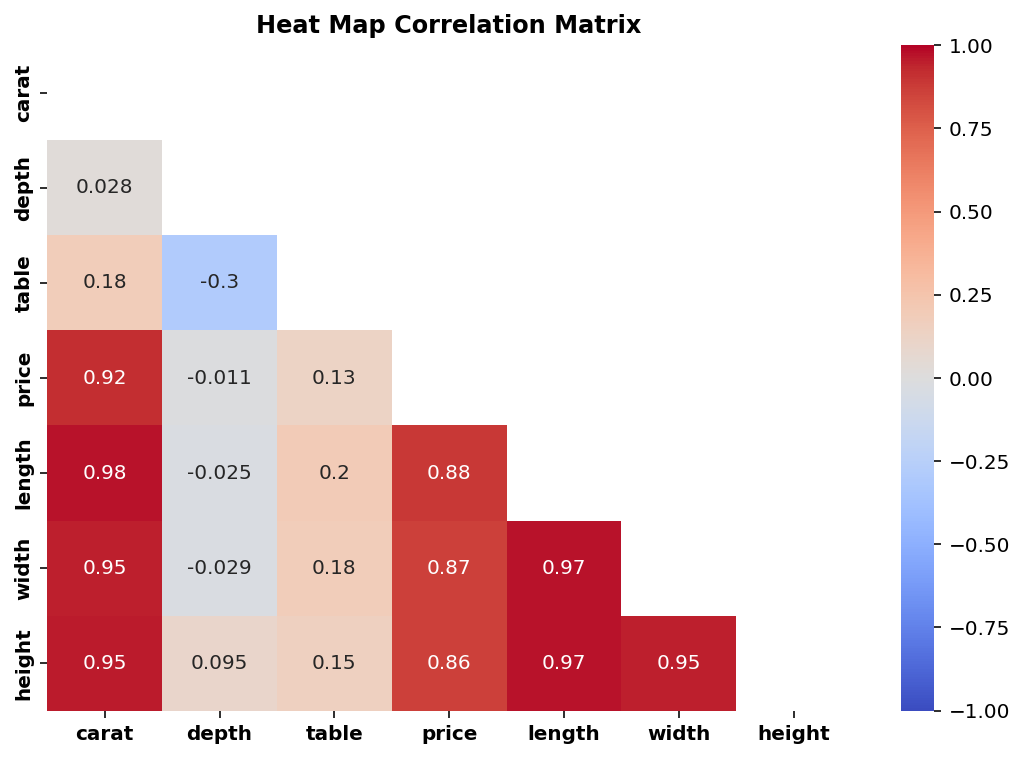

In [1009]:
# calling the function
correlation_matrix()

---

- From the above correlation matrix we can see that there is a strong positive correlation between `price, carat, height, width and length` columns of diamonds dataset which is greater than 0.9. So for the fitting purposes we can use these columns to predict the price of the diamond.
- Whereas `table` column shows no correlation with `carat, price, height, width and length` column. So for clustering purposes we use these columns to predict the carat of the diamond.

---


### **Data Cleaning**

In [1010]:
# checking for missing values
print(f'There are {df.isnull().sum().sum()} missing values in the dataset')
df.isnull().sum()

There are 0 missing values in the dataset


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
length     0
width      0
height     0
dtype: int64

In [1011]:
# checking for duplicates
print(f'There are duplicates in the dataset: {df.duplicated().any()} ')

There are duplicates in the dataset: True 


In [1012]:
# printing the rows which are duplicates in the dataset
df[df.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,length,width,height
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


---

- From the above it is clear that there are no missing values in our dataset
- However, theer are 289 duplicate rows in our dataset and from the above it is clear they are true dulicates of each other
    - So, in short we have to drop the rows which are duplicates to reduce data redundancy.
---

In [1013]:
# dropping the duplicates
df.drop_duplicates(inplace=True)

In [1014]:
# confirming the outcondition
print(f'There are duplicates in the dataset: {df.duplicated().any()} ')

# printing the rows and columns of the dataset after duplication removal
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

There are duplicates in the dataset: False 
The dataset has 53794 rows and 10 columns


---

- Earlier we have 53940 rows in our dataset but after removing the duplicates we have 53794 rows in our dataset

---

### **Exploratory Data Analysis & Data Visualization** 

In [1015]:
# check for unique values
print('The number of unique values in each column are:')
df.nunique()

The number of unique values in each column are:


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
length       554
width        552
height       375
dtype: int64

In [1016]:
# unique values in the cut column
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [1017]:
# count of unique values in the cut column
df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

### **Pie Chart**

In [1123]:
# function to create a pie chart
def pie_chart():
    '''
    Function to create a pie chart
    '''
    # setting the figure size
    plt.figure(figsize=(7, 5), dpi=144)

    # creating the pie chart
    plt.pie(df['cut'].value_counts(), labels=df['cut'].value_counts().index, autopct='%1.1f%%')

    # setting the title
    plt.title('Cut Distribution', fontdict={'fontsize': 14, 'fontweight': 'bold'})

    # showing the plot
    plt.show()

    return

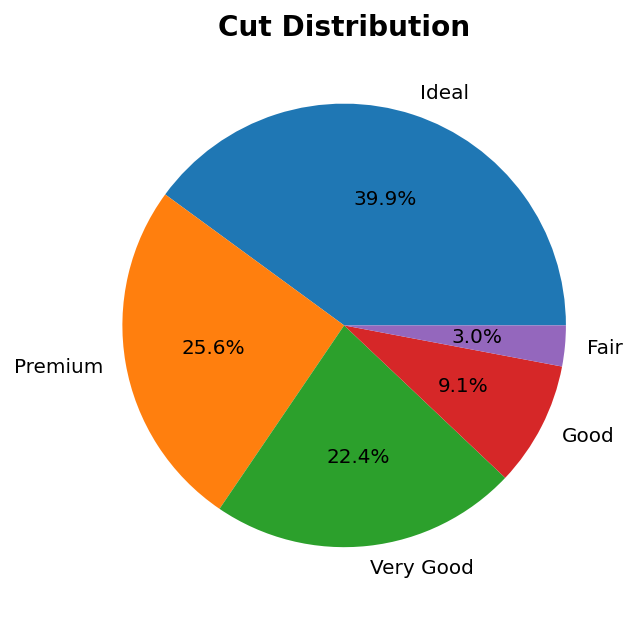

In [1124]:
# calling the function
pie_chart()

---

- In our dataset we have almost 40% of the diamonds with `Ideal` cut
- The second and third largest catagories of the cut type are `Premium` and `Good` which are 25% and 22% respectively.
- The quantity of the `Fair` cut is very less in our dataset which is only 3%

----

In [1020]:
# average cut value for carat
df.groupby('cut')['carat'].mean()

cut
Fair         1.043736
Good         0.847215
Ideal        0.703472
Premium      0.891620
Very Good    0.806195
Name: carat, dtype: float64

In [1021]:
# average price value for each carat
df.groupby('cut')['price'].agg(['mean', 'max', 'min']).round(2)

,mean,max,min
cut,,,
Fair,4341.95,18574,337
Good,3919.12,18788,327
Ideal,3462.75,18806,326
Premium,4583.50,18823,326
Very Good,3981.02,18818,336


In [1111]:
# define a function to create a bar chart
def bar_chart():
    '''
    Function to create a bar chart
    '''
    # setting the figure size
    plt.figure(figsize=(15, 8), dpi=144)

    # creating the bar chart
    df.groupby('cut')['price'].agg(['mean', 'max', 'min']).plot(kind='barh')

    # setting the title
    plt.title('Cut Distribution vs Price Statistics' , fontdict={'fontsize': 14, 'fontweight': 'bold'})

    # defining limit for the x axis
    plt.xlim(0, 30000)

    # plotting the crossponding values with labels
    for container in plt.gca().containers:
        plt.gca().bar_label(container)

    # formatting the x and y axis
    plt.xticks(fontweight='bold', fontsize=10)
    plt.yticks(fontweight='bold', fontsize=10, rotation=45)

    # formatting the ylabels
    plt.ylabel('Cut', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    # deining the legend location
    plt.legend(loc='best')

    # showing the plot
    plt.show()

<Figure size 2160x1152 with 0 Axes>

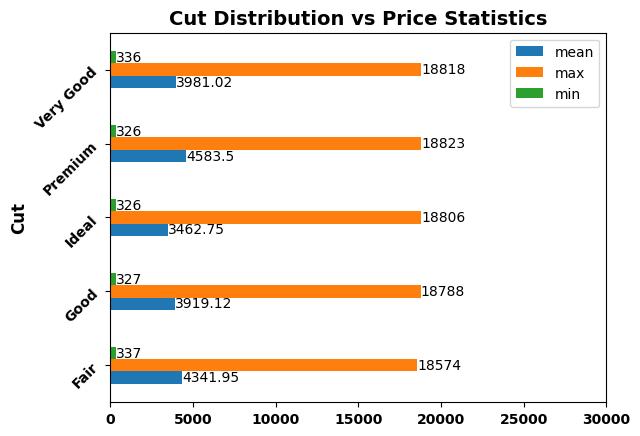

In [1112]:
# calling the function
bar_chart()

---
- `Ideal` cut has the highest price in usd which is `18806`
- Whereas, the varaition in minimum price is very less in all the `cut` types.
- The average `price` of `Premium` cut is higher than all other cuts which is `4583.50` in USD. 
- `Fair` cut has the second highest average `price` which is `4341.95.00` in USD.

----

In [1024]:
# checking unique values in color column
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [1025]:
# checking the value count of unque values in color column
df['color'].value_counts() 

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

----

- In our dataset we have 7 unique colors which are `D`, `E`, `F`, `G`, `H`, `I` and `J`.
- According to the data card `J -> worst` and `D -> best`
- We have `J` 2802 enteries of diamonds which indicates as worst color
- `D` 6755 enteries of diamonds which indicates as best color  
----

In [1026]:
# checking the unique values in clarity column
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [1027]:
# checking the value count of unique values in clarity column
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

---
- In our dataset we have 8 unique clarity which are `I1`, `SI2`, `SI1`, `VS2`, `VS1`, `VVS2`, `VVS1` and `IF`

- `I1` is the worst clarity and `IF` is the best clarity

- We have ony 740 diamonds in our dataset with worst clarity which is `I1` and 1784 diamonds with best clarity which is `IF`

---


In [1141]:
# defining a function to plot histograms
def plot_histograms():
    '''
    The function to plot histograms
    '''
    # define the figure size
    
    # Iterate over selected columns
    for i, col in enumerate(['carat', 'depth', 'table', 'price', 'length', 'width', 'height']):
        plt.figure(figsize=(6, 4), dpi=144)

        # Create a subplot for each column
        # plt.subplot(4, 2, i + 1)
        # Create a histogram for the selected column using Seaborn
        sns.histplot(df[col], kde=True, palette='coolwarm', binwidth=0.5, bins=50)


        
        # calculating and printing the skewness
        plt.text(0.95, 0.70, f'Skewness = {stats.skew(df[col]):.2f}', 
         ha='right',  # horizontal alignment
         va='center', # vertical alignment
         transform=plt.gca().transAxes, # transform the text to be relative to the axes 
         fontsize=16, 
         color='black')
        
        # calculating and printing the kurtosis
        plt.text(0.95, 0.60, f'Kurtosis = {stats.kurtosis(df[col]):.2f}', 
         ha='right',  # horizontal alignment
         va='center', # vertical alignment
         transform=plt.gca().transAxes, # transform the text to be relative to the axes
         fontsize=16, 
         color='green')
        
        # formatting the x and y ticks
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')

        # formating the x and y labels
        plt.xlabel(col, fontsize=12, fontweight='bold')
        plt.ylabel('Count', fontsize=12, fontweight='bold')
        
        # adding title
        plt.title(f'The histogram of {col}', fontsize=14, fontweight='bold')
        
        # adjusting layout to avoid overlapping
    plt.tight_layout()  
    plt.show()

    return


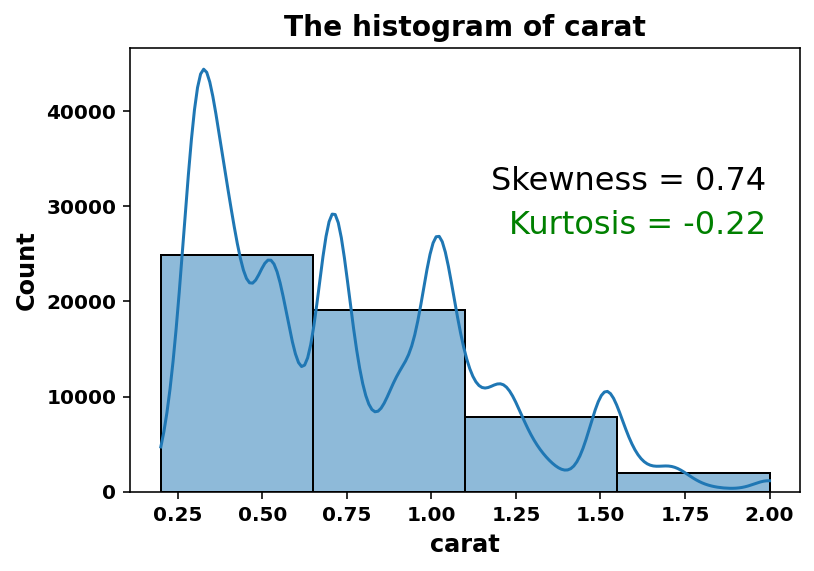

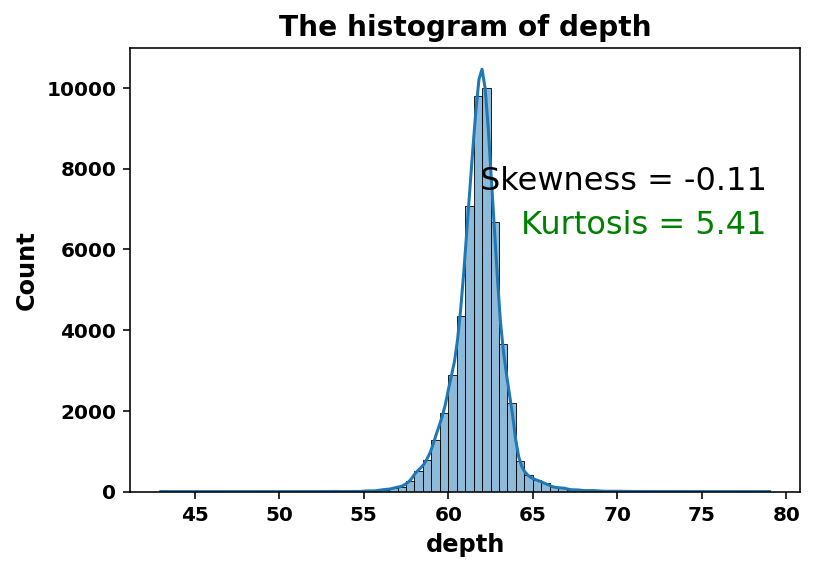

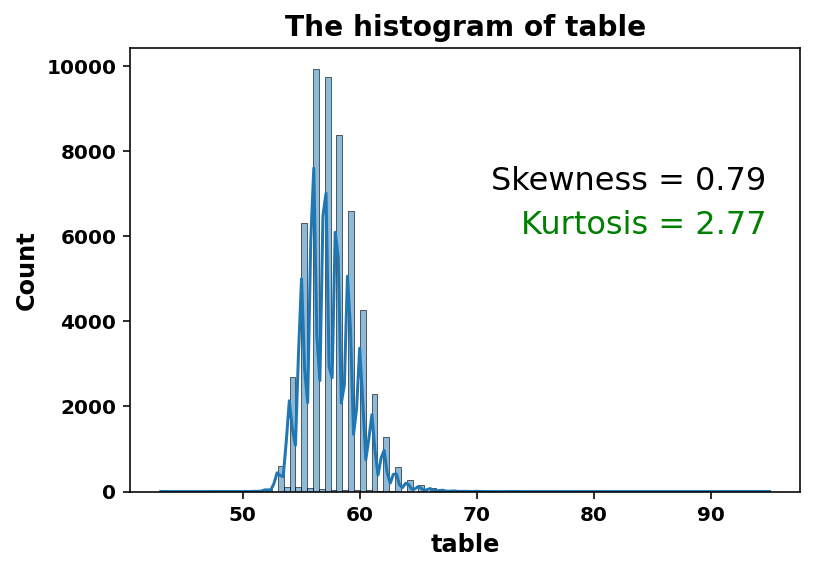

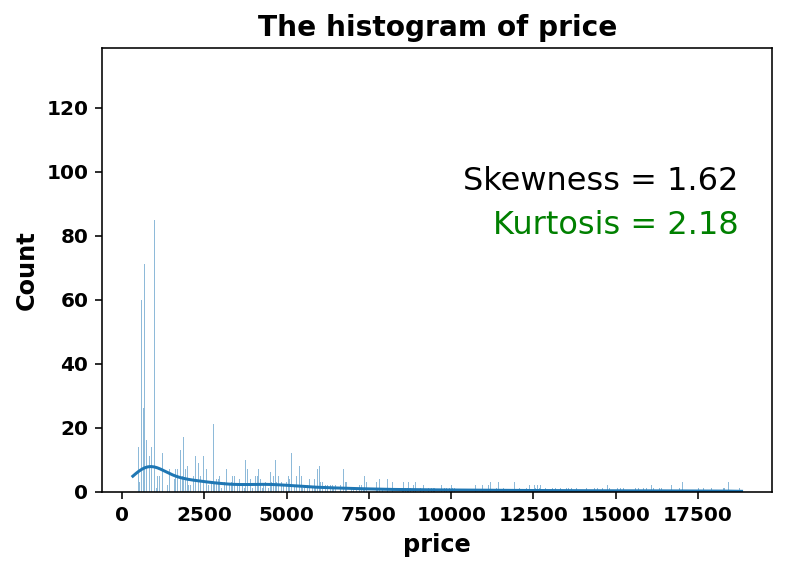

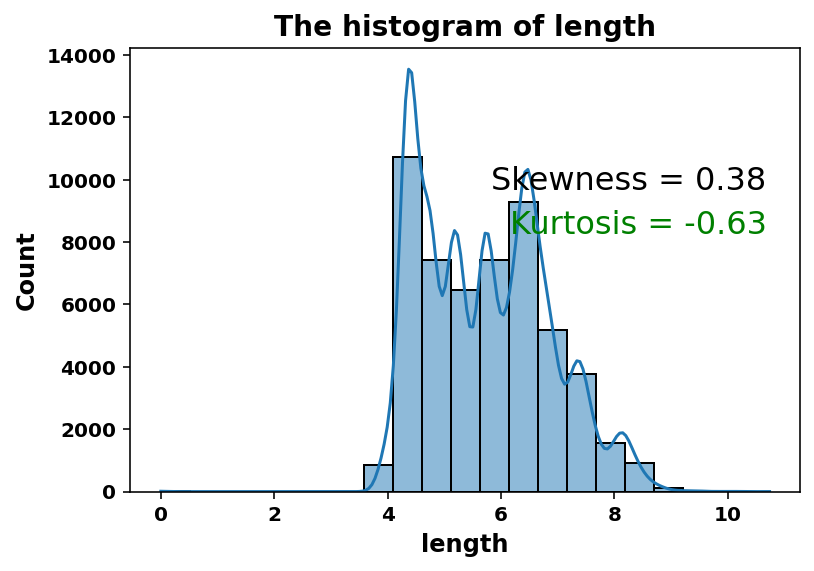

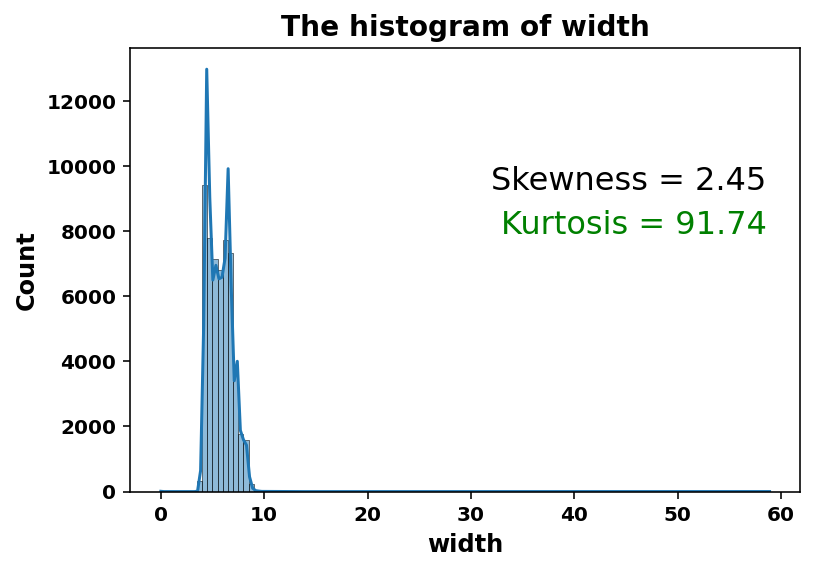

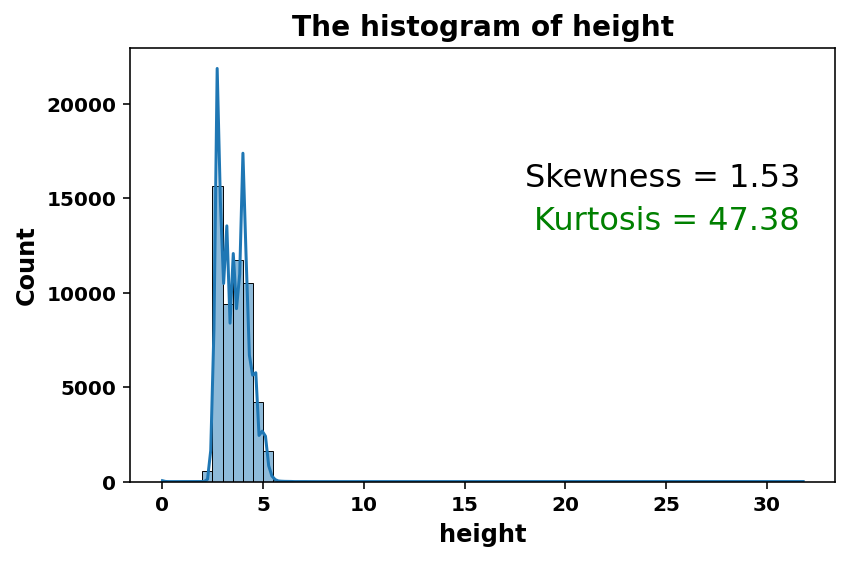

In [1142]:
plot_histograms()

---
- From the abpve histograms we can see that both `price` and `carat` are highly skewed to the right.
- `width` and `tail` columns have almost same distribution and long tails.
- `depth` column has long tails but has a guassian distribution.

----

### **Box Plots**

In [1030]:
# defining a function to plot boxplot

def boxplot():
    '''
    The function to plot boxplot
    '''
    # define the figure size
    plt.figure(figsize=(20, 16), dpi=144)
    
    # Iterate over columns in the DataFrame
    for i, col in enumerate(['carat', 'depth', 'table', 'price', 'length', 'width', 'height']):
        
        # Create a subplot in a 2x2 grid (adjusting the index with +1 to get correct positions)
        plt.subplot(4, 2, i + 1)
        
        # Create a boxplot for the selected column
        plt.boxplot(df[col])
        
        # defining title
        plt.title((f'Box plot of: {col}'), fontsize=12, fontweight='bold')

        # formatting the x and y ticks
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')

    # Adjust layout to avoid overlapping
    plt.tight_layout()  
    plt.show()

    return


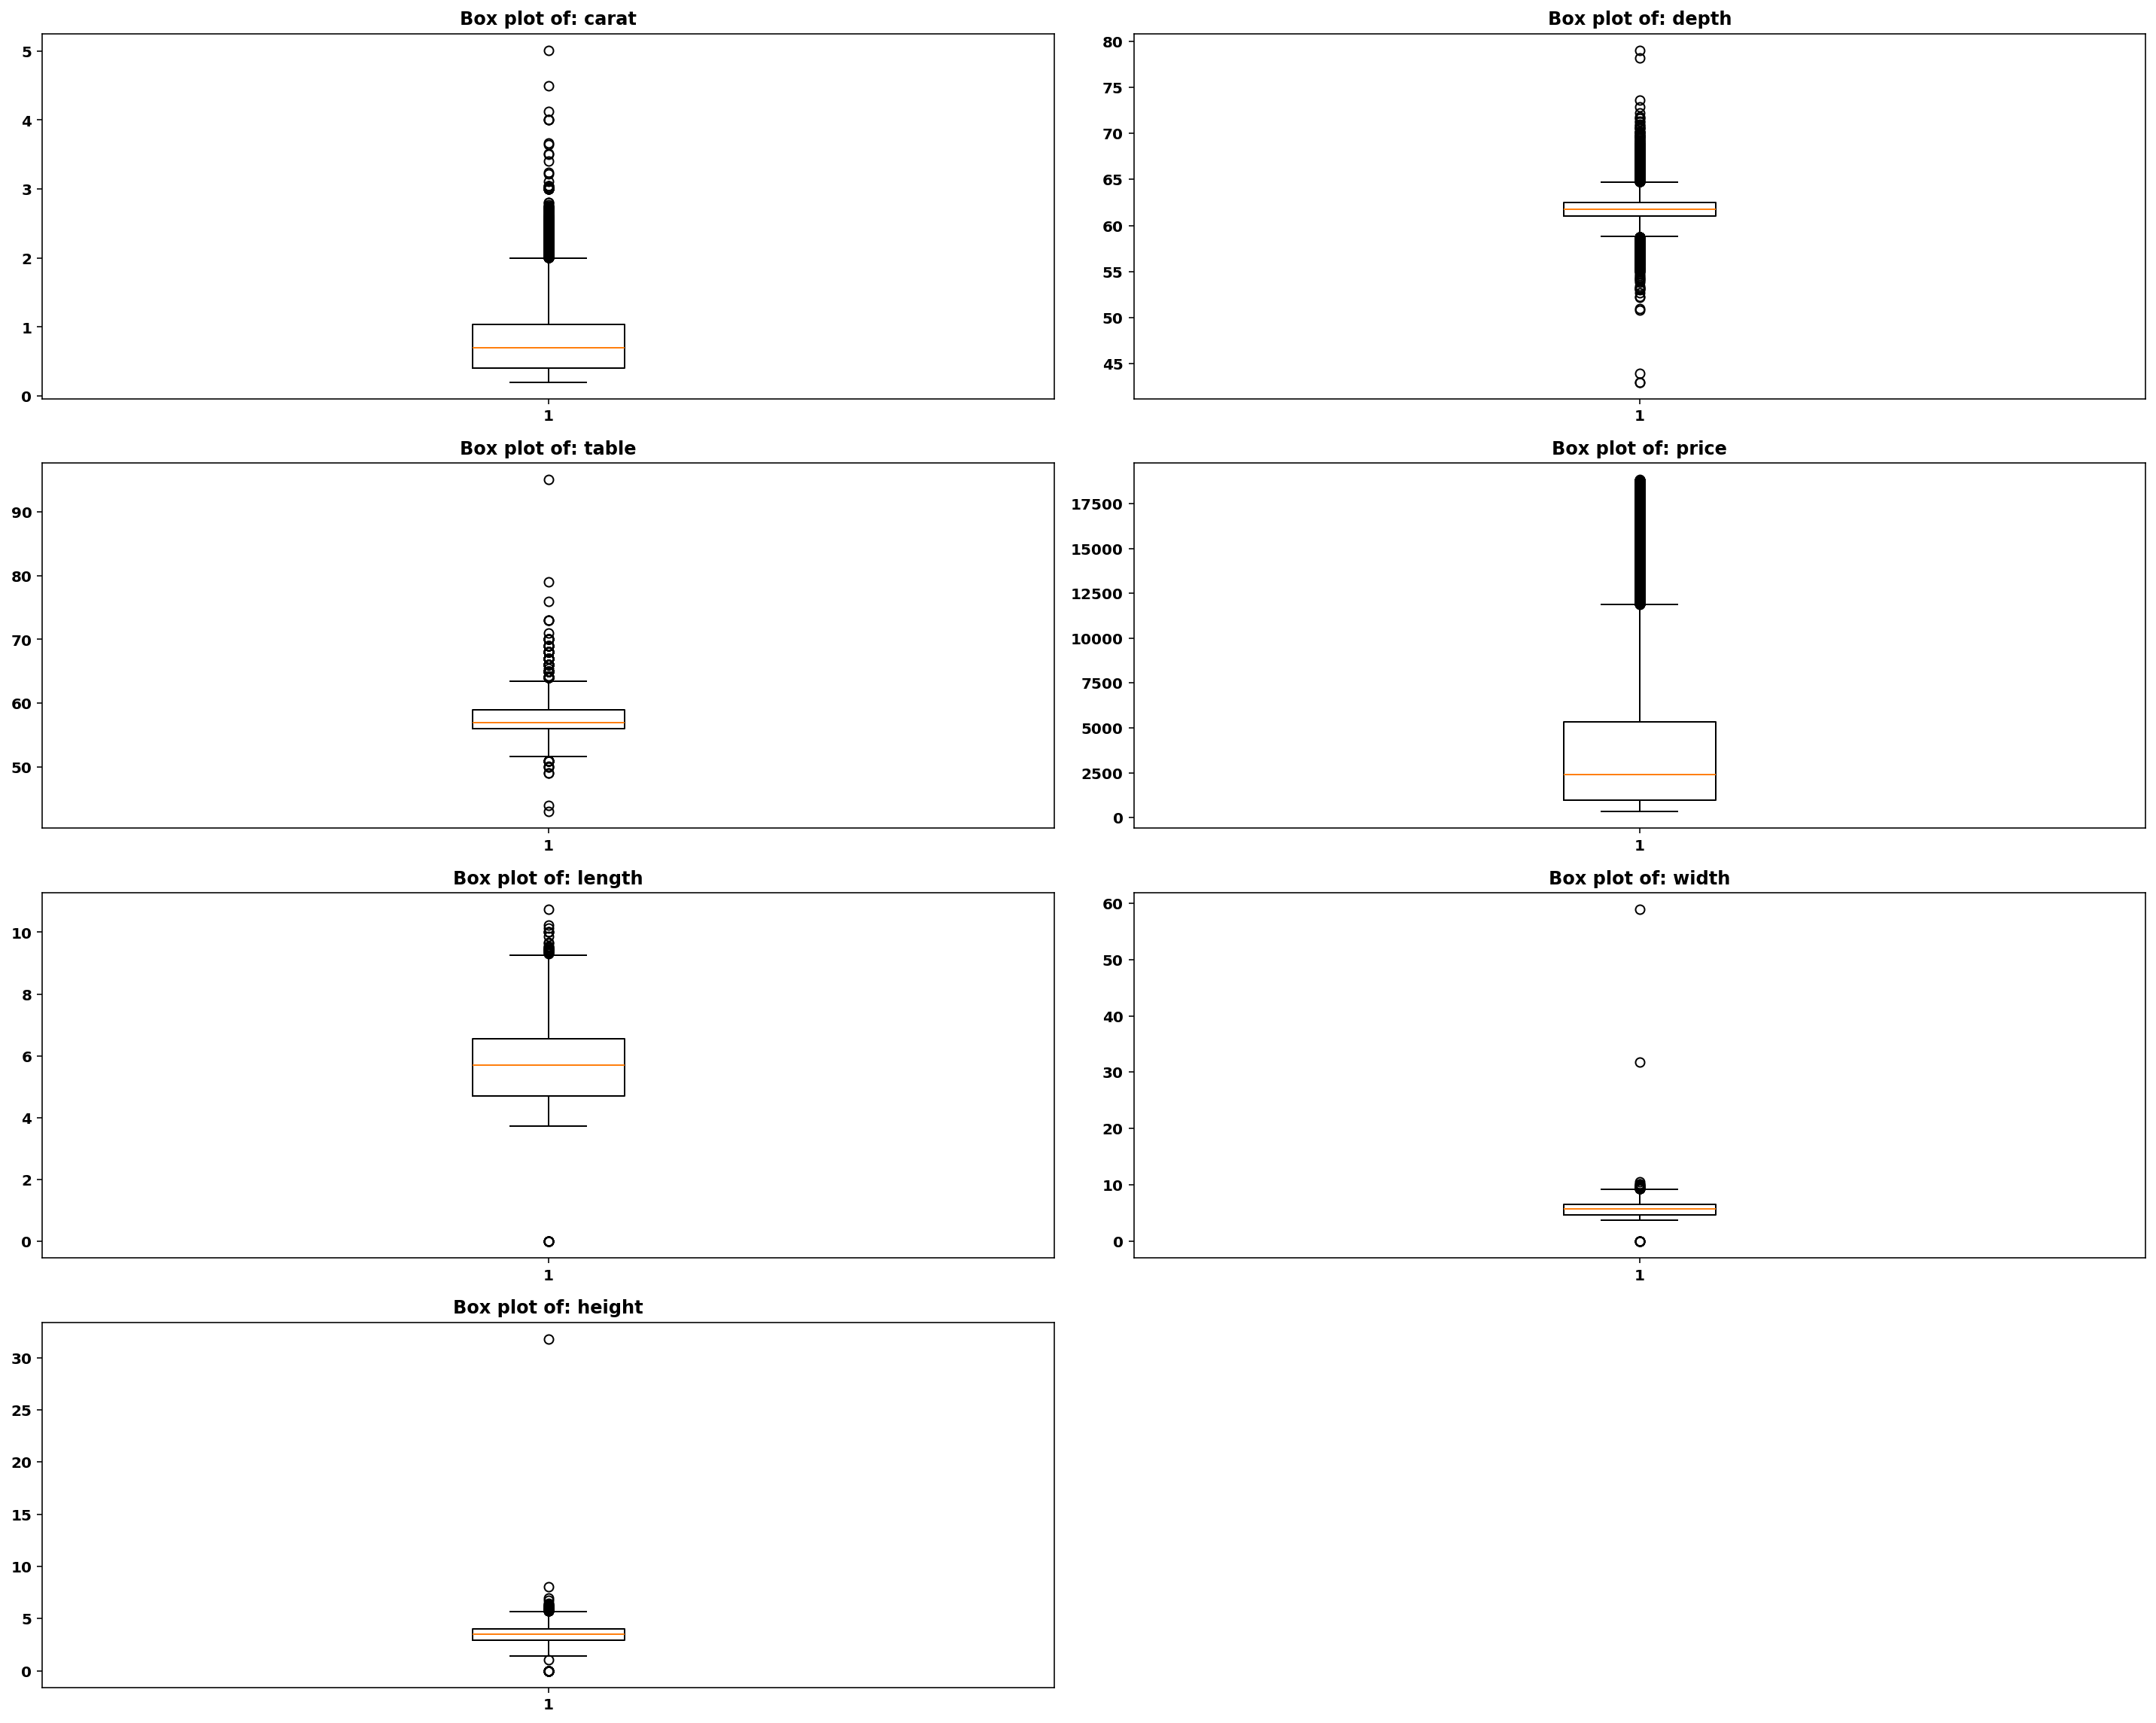

In [1031]:
boxplot()

---

- From the above boxplots we can see that all our columns has outliers.
- To treat outliers we can use `IQR` method.

---

### **Removing Outliers**

In [1032]:
def remove_outliers(df):
    '''
    # for loop which runs through each column
    '''
    for column in df.columns:
        # setting if condition just to skip the class column
        if col in ['carat', 'depth', 'table', 'price', 'length', 'width', 'height']:
            
            # finding the fisrt quartile 
            q1 = df[column].quantile(0.25)
            
            # finding the third quartil
            q3 = df[column].quantile(0.75)
            
            # calculating the inter quartile range
            iqr = q3 - q1
            
            # calculating the upper & lower bounds
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # finding the rows which are either higher or less than upper or lower bounds
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            
            # Replacing the enteries of outliers with the median of the respective column
            df[column] = np.where(
                (df[column] < lower_bound) | (df[column] > upper_bound), 
                df[column].median(), 
                df[column])
            
        return

In [1033]:
# calling the function to remove outliers
remove_outliers(df)

### **Box plots after removing outliers**

In [1034]:

def boxplot_after_outliers_removal(df):
    '''
    The function to plot boxplots of multiple columns after outliers are removed with the 'cut' column as the hue.
    '''
    # define the figure size
    plt.figure(figsize=(20, 16), dpi=144)
    
    # List of columns to plot
    columns = ['carat', 'depth', 'table', 'price', 'length', 'width', 'height']
    
    # Iterate over columns in the DataFrame
    for i, col in enumerate(columns):
        
        # Create a subplot 
        plt.subplot(4, 2, i + 1)
        
        # Create a boxplot for the selected column
        sns.boxplot(x='cut', y=col, data=df, palette='Set2')  # Pass the DataFrame and specify the columns
        
        # Define title
        plt.title(f'Box plot of: {col}', fontsize=12, fontweight='bold')

        # Format x and y ticks
        plt.xticks(fontsize=10, fontweight='bold', rotation=45)  # Rotate if labels overlap
        plt.yticks(fontsize=10, fontweight='bold')

    # Adjust layout to avoid overlapping
    plt.tight_layout()  
    plt.show()


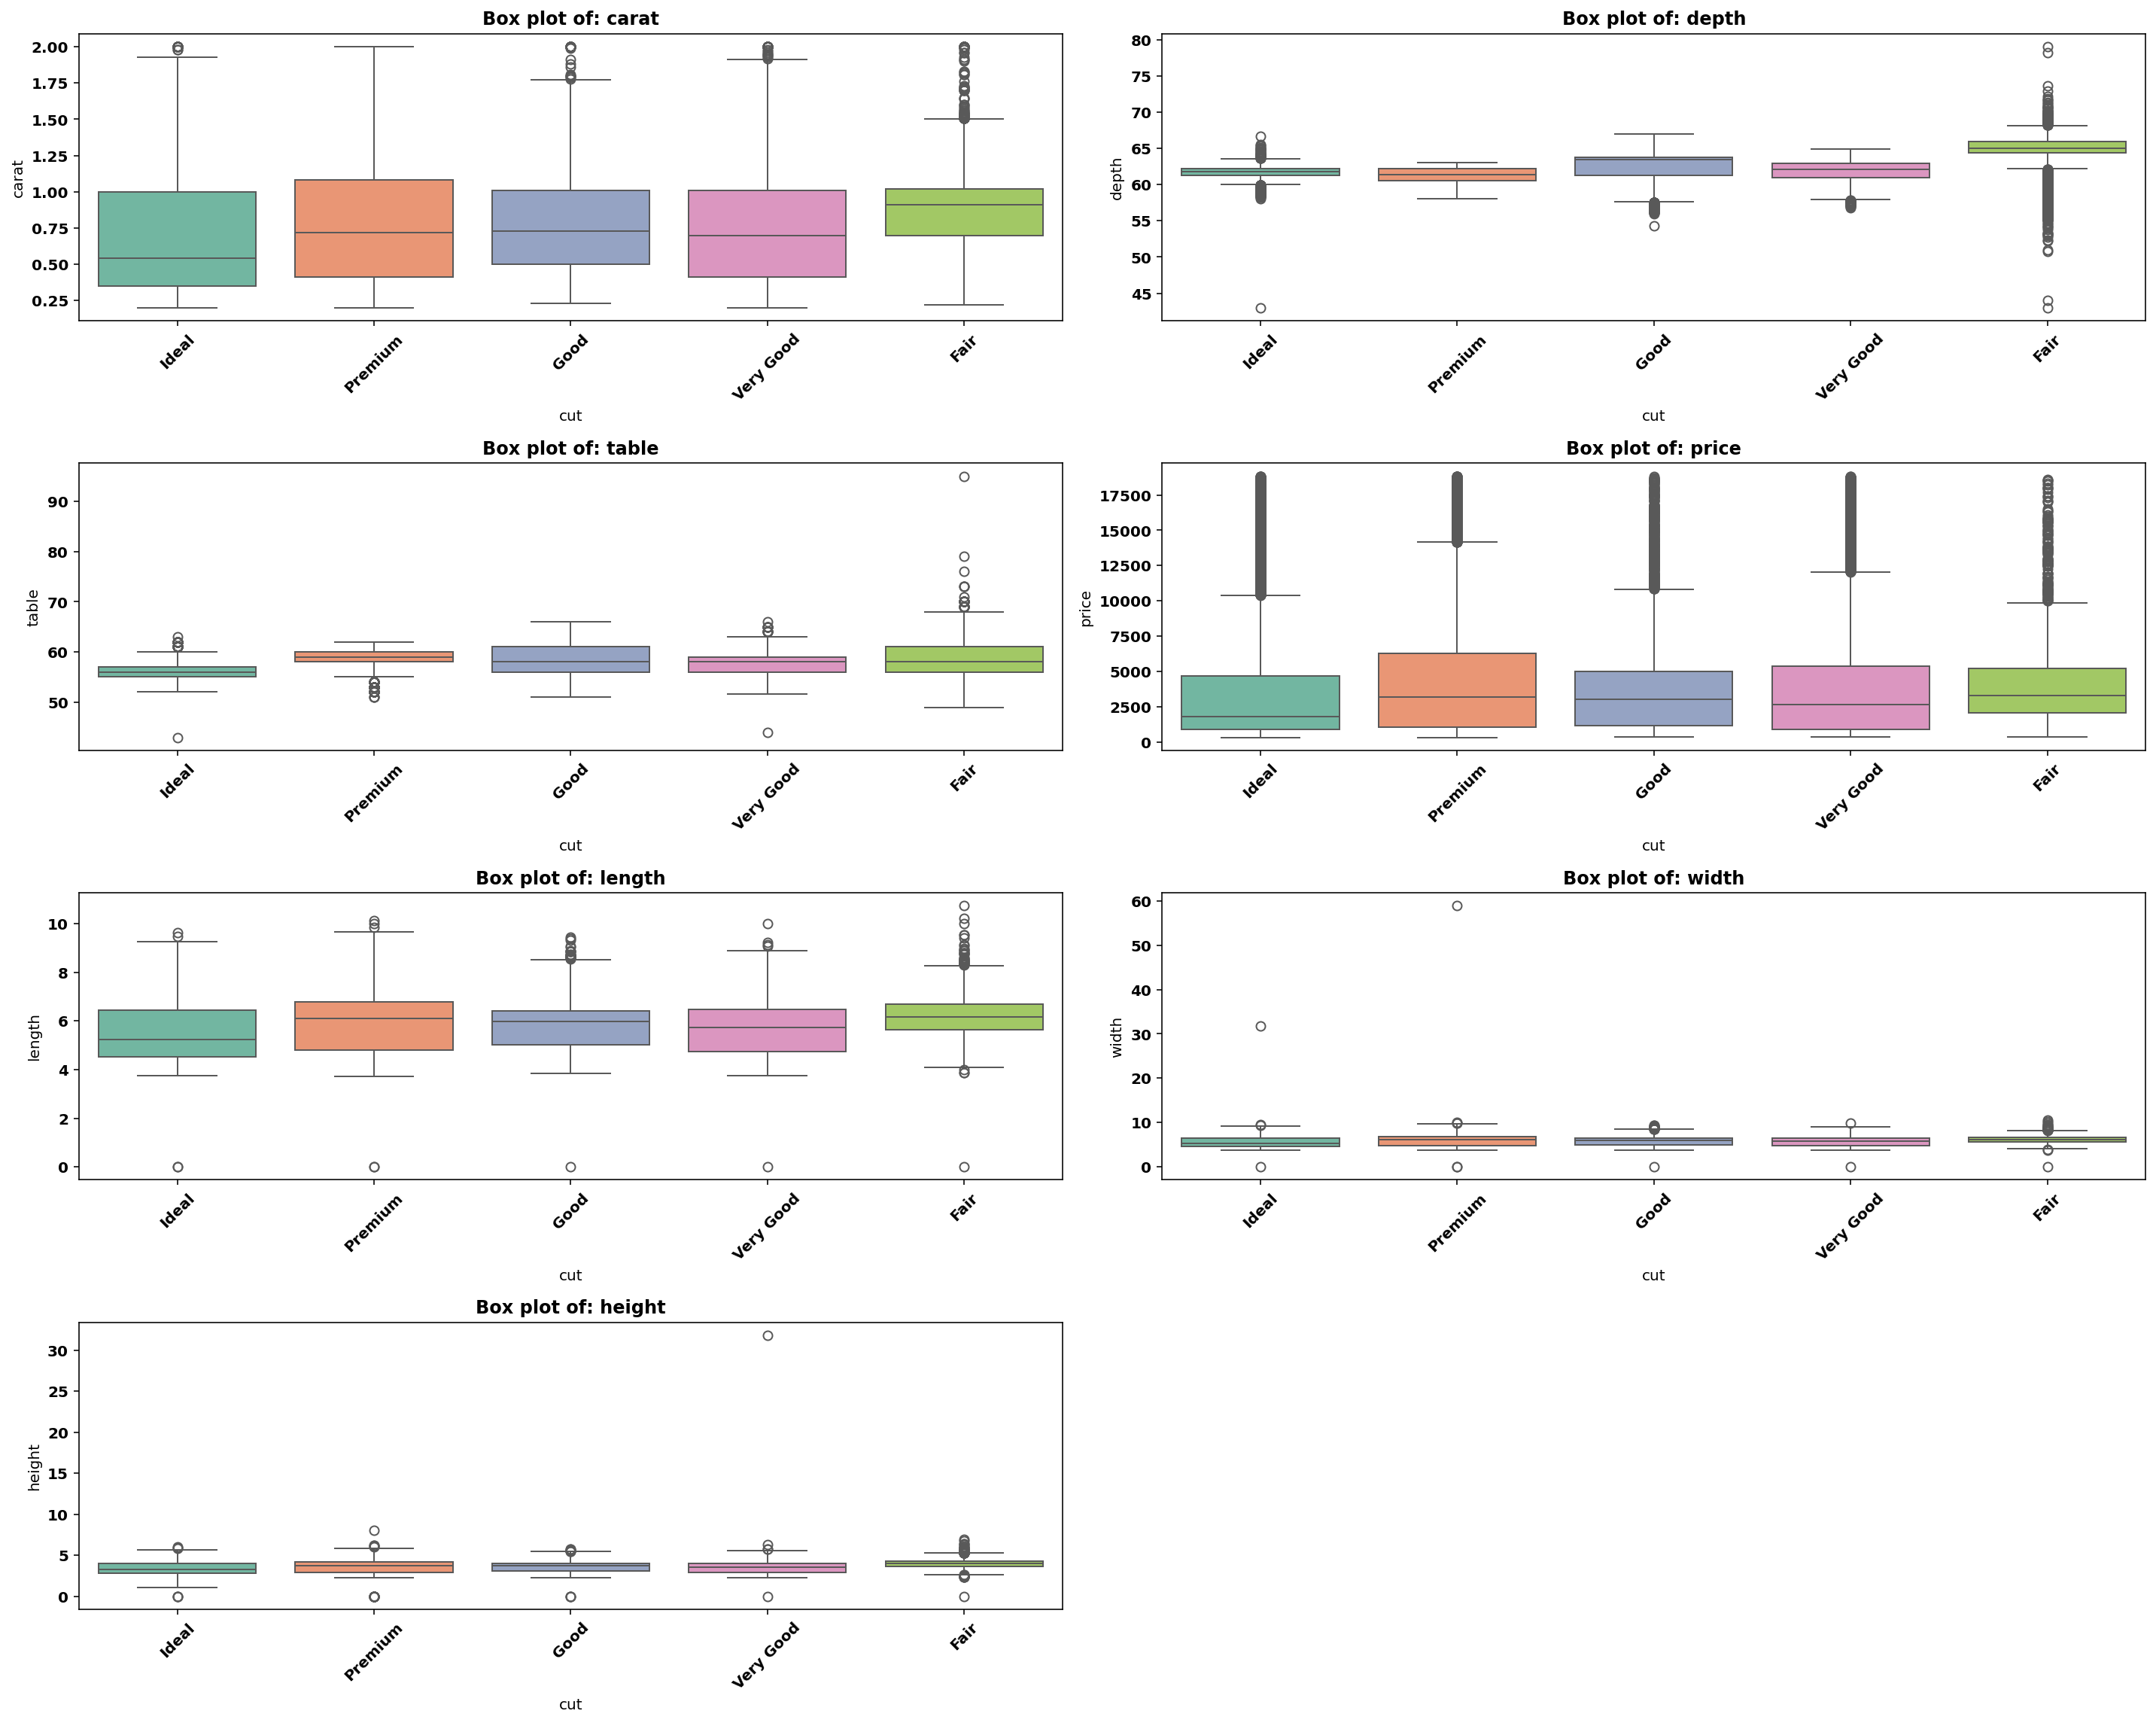

In [1035]:
# calling the function
boxplot_after_outliers_removal(df)

---

- From the abpve boxplots which are plotted using seaborn and hue is defined by the cut column, we can see that the distribution is now become more uniform.
- Although `price` column still left with with some outliers.
- `length, table and depth` columns has left with some outliers in a case where `cut` column is labeled as `fair`

---

### **K-Means Clustering**

In [1036]:
# checking the first 5 rows
df.head()

,carat,cut,color,clarity,depth,table,price,length,width,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### **Feature Selection**

In [1037]:
# selecting the features 'height', 'width', 'length', 'table' for clustering
X = df[['carat', 'price']].copy()

---

- The feature selection is done because `carat` and `price` are the most important features for the clustering.
- The `carat` is the weight of the diamond and `price` is the price of the diamond.

---

#### **Normalization**

In [1038]:
# calling the scaler
scaler = MinMaxScaler()

# fitting the scaler
norm = scaler.fit_transform(X)
# inverse transform 
inv_norm = scaler.inverse_transform(norm)

---

- Scaling the data using Min Max Scaler before clustering.
- Min Max Scaler is used because it scales the data to a range between 0 and 1.

---

#### **Elbow Method**

In [ ]:
# defining a function to plot the elbow method
def plot_elbow_method(min_k, max_k, wcss, best_n):
    """
    Plots the elbow method between min_k and max_k
    """
    # define the figure size
    fig, ax = plt.subplots(dpi=144)
    # plot the elbow method
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker='o', color='red', facecolors='none', s=50)
    # formatting the x and y axis
    ax.set_xlabel('k')
    ax.set_xlim(min_k-1, max_k)
    ax.set_ylabel('WCSS')

    # setting the title
    ax.set_title('Elbow Method (best value for k)', fontsize=12, fontweight='bold')
    plt.show()
    return

----

- The elbow method is a method to find the optimal number of clusters in a dataset.
- The elbow method is a plot of the within-cluster sum of squares (WCSS) as a function of the number of clusters.
--- 

#### **Silhoutte Score**

In [1040]:
def one_silhoutte_inertia(n, xy):
    """
    Calculates the silhoutte score and WCSS for n clusters
    """
    # Create the model to calculate the silhoutte score
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    # calculate the WCSS
    inertia = kmeans.inertia_
    return score, inertia

----

- The silhoutte score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The higher the silhoutte score, the better the clustering.
---

#### **Calculating the best number of clusters and plotting the elbow method**

 2 clusters silhoutte score = 0.60
 3 clusters silhoutte score = 0.59
 4 clusters silhoutte score = 0.61
 5 clusters silhoutte score = 0.56
 6 clusters silhoutte score = 0.55
 7 clusters silhoutte score = 0.54
 8 clusters silhoutte score = 0.54
 9 clusters silhoutte score = 0.54
10 clusters silhoutte score = 0.53
Best number of clusters =  4


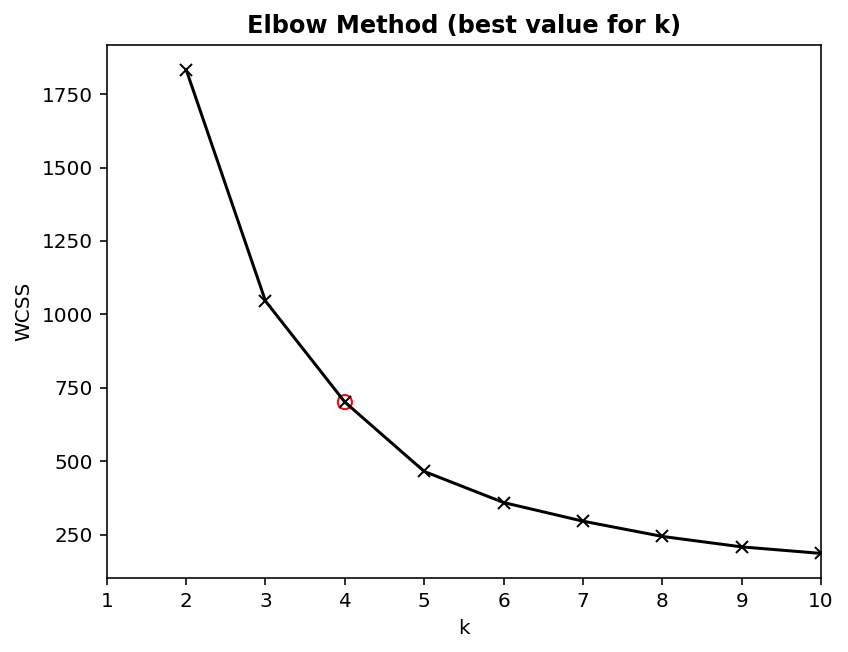

In [1041]:
# finding the best number of clusters

# an empty list to store the WCSS
wcss = []
# settting the condition to find the best silhoutte score and number of clusters
best_n, best_score = None, -np.inf

# looping through the number of clusters from 2 to 10
for n in range(2, 11): 
    # calculating the silhoutte score and WCSS
    score, inertia = one_silhoutte_inertia(n, norm)
    wcss.append(inertia)
    if score > best_score:
        best_n = n
        best_score = score
        # print the silhoutte score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

# printing the best number of clusters
print(f"Best number of clusters = {best_n:2g}")

# plotting the elbow method and visualizing the best number of clusters with higher silhoutte score
plot_elbow_method(2, 10, wcss, best_n)

#### **Function to Plot the Clusters**

In [1042]:
# function to plot the clusters
def plot_clusters(labels, xy, xkmeans, ykmeans):
    """
    Plots clustered data as a scatter plot with determined centres shown
    """
    # colour palette
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    # create a colour map
    cmap = ListedColormap(colours)
    # defining the dpi of the figure 
    plt.figure(figsize=(9, 6))

    fig, ax = plt.subplots(dpi=144)
    # scatter plot
    s = ax.scatter(xy[:, 0], xy[:, 1], c=labels, cmap=cmap, marker='o',label='Data')
     # Modify the Estimated Centres' appearance
    ax.scatter(xkmeans, ykmeans, c='black', marker='*', s=200, edgecolor='white', label='Estimated Centres')

    cbar = fig.colorbar(s, ax=ax)
    # setting the cbar
    cbar.set_ticks(np.unique(labels))
    # defining the legend
    ax.legend()

    # setting the title
    ax.set_title('Best Fitted Clusters', fontsize=12, fontweight='bold')

    plt.legend(loc='best')

    # setting the x and y labels
    ax.set_xlabel('Carat', fontweight='bold')
    ax.set_ylabel('Price', fontweight='bold')
    
    return



#### **Fitting the KMeans Model**

In [1043]:
# calling the kmeans and assigning best number of clusters
kmeans = KMeans(n_clusters=best_n, n_init=20)

# fitting the normal data to the model of kmeans
kmeans.fit(norm) 

# the estimated cluster labels
labels = kmeans.labels_

# storing the cluster labels
df['cluster'] = labels

# the estimated cluster centres
cen = scaler.inverse_transform(kmeans.cluster_centers_)
xkmeans = cen[:, 0]
ykmeans = cen[:, 1]
cenlabels = kmeans.predict(kmeans.cluster_centers_)

#### **Plotting the Best Clusters**

<Figure size 900x600 with 0 Axes>

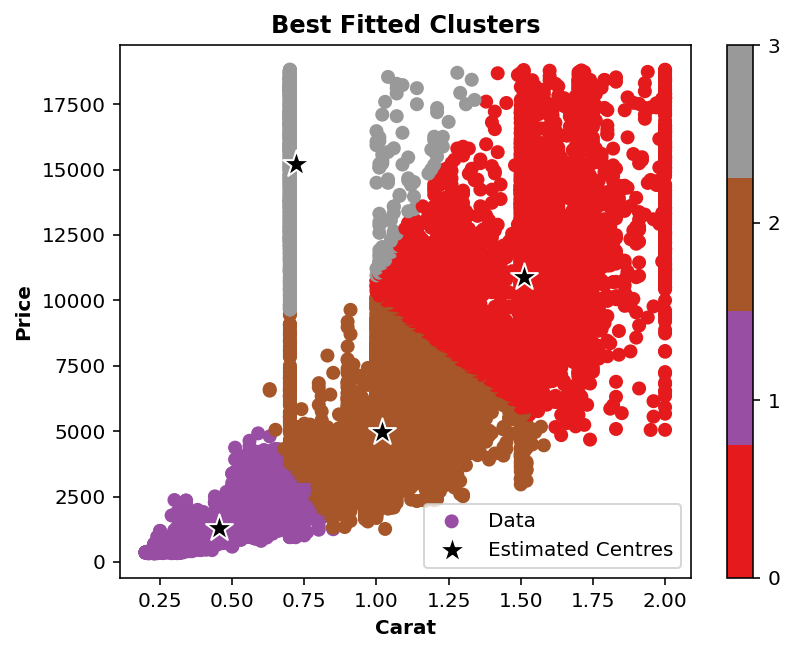

In [1044]:
# calling the function to plot the clusters
plot_clusters(labels, inv_norm, xkmeans, ykmeans)

#### **Predicting the Cluster for Random (carat and price) values**

In [1045]:
# random values for carat and price
random_points = np.array([[0.68, 1100], [1.15, 7250], [1.8, 17000], [1.1, 14000]])

# normalizing the random points before feeding it to the model
random_norm = scaler.transform(random_points)

# inverse normalizing the cluster centers 
cen = scaler.inverse_transform(kmeans.cluster_centers_)

# predict the clusters for the random points
prediction = kmeans.predict(random_norm)

# points to prediction, get the price for each cluster
predicted_prices = cen[prediction, 1]  

#### **Printing the Actual and Predicted Prices alos the Predicted Clusters**

In [1046]:
print("Actual Prices for Random Carat Values:", random_points[:, 1], '\n')
print("Predicted Prices for Random Carat Values:", predicted_prices, '\n')
print("Predicted Clusters for Random Carat Values:", prediction, '\n')


Actual Prices for Random Carat Values: [ 1100.  7250. 17000. 14000.] 

Predicted Prices for Random Carat Values: [ 1302.09439193  4983.13699901 10906.05717741 15220.95626976] 

Predicted Clusters for Random Carat Values: [1 2 0 3] 



#### **Plotting the Clusters with Predictions**

In [1207]:
# function to predict values
def predicted_values():
    '''
    A function to plot the predicted values
    '''
    # calling the function to plot the clusters
    plot_clusters(labels, inv_norm, xkmeans, ykmeans)
    # Plot the predicted points
    plt.scatter(random_points[:, 0], predicted_prices, c='orange', marker='o', s=150, label="Predicted Points")
    # formattig
    plt.xlabel('Carat')
    plt.ylabel('Price')
    plt.title('K-Means Clusters with Predicted Points', fontweight='bold')
    
    plt.legend(loc='best')
    plt.show()
    return


<Figure size 900x600 with 0 Axes>

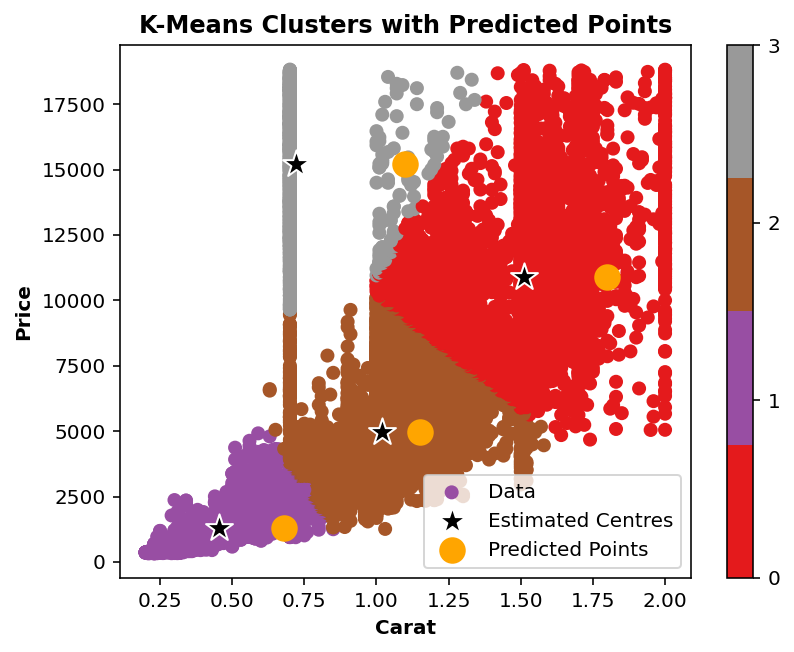

In [1208]:
# calling the function
predicted_values()

----
- For the K-means we pass carat as the independent variable and price as dependet. When we pass on the selecting columns to elbow method and run it in a loop in the range (2, 11) we got best number of clusters = 4.

----

### **Reg Plot**

In [1170]:
# define a function to plot reg plot

# selecting only the desired numeric columns from dataframe
numeric_df = df[['carat', 'depth', 'table', 'price', 'length', 'width', 'height']]

def reg_plot():
    '''
    Plotting the reg Plot
    '''
    # define the figure size
    plt.figure(figsize=(25, 70), dpi=144)
    
    # for loop to plot the regression plot
    for i in range(len(numeric_df.columns)):
        plt.subplot(20 , 2 , i+1)
        # check if the column is 'price' and skip it
        if numeric_df.columns[i] == 'price':
            continue
        
        # plot the regression plot
        sns.regplot(data= numeric_df, x = numeric_df.columns[i], y='price')
        # set the title
        plt.title(f'Regression plot of {numeric_df.columns[i]}', fontsize=14, fontweight='bold')

        # formatting
        plt.xlabel(numeric_df.columns[i], fontsize=12, fontweight='bold')
        plt.ylabel('price', fontsize=12, fontweight='bold')
        plt.xticks(fontsize=10, fontweight='bold')
        plt.yticks(fontsize=10, fontweight='bold')
    # defining layout
    plt.tight_layout()
    plt.show()

    return

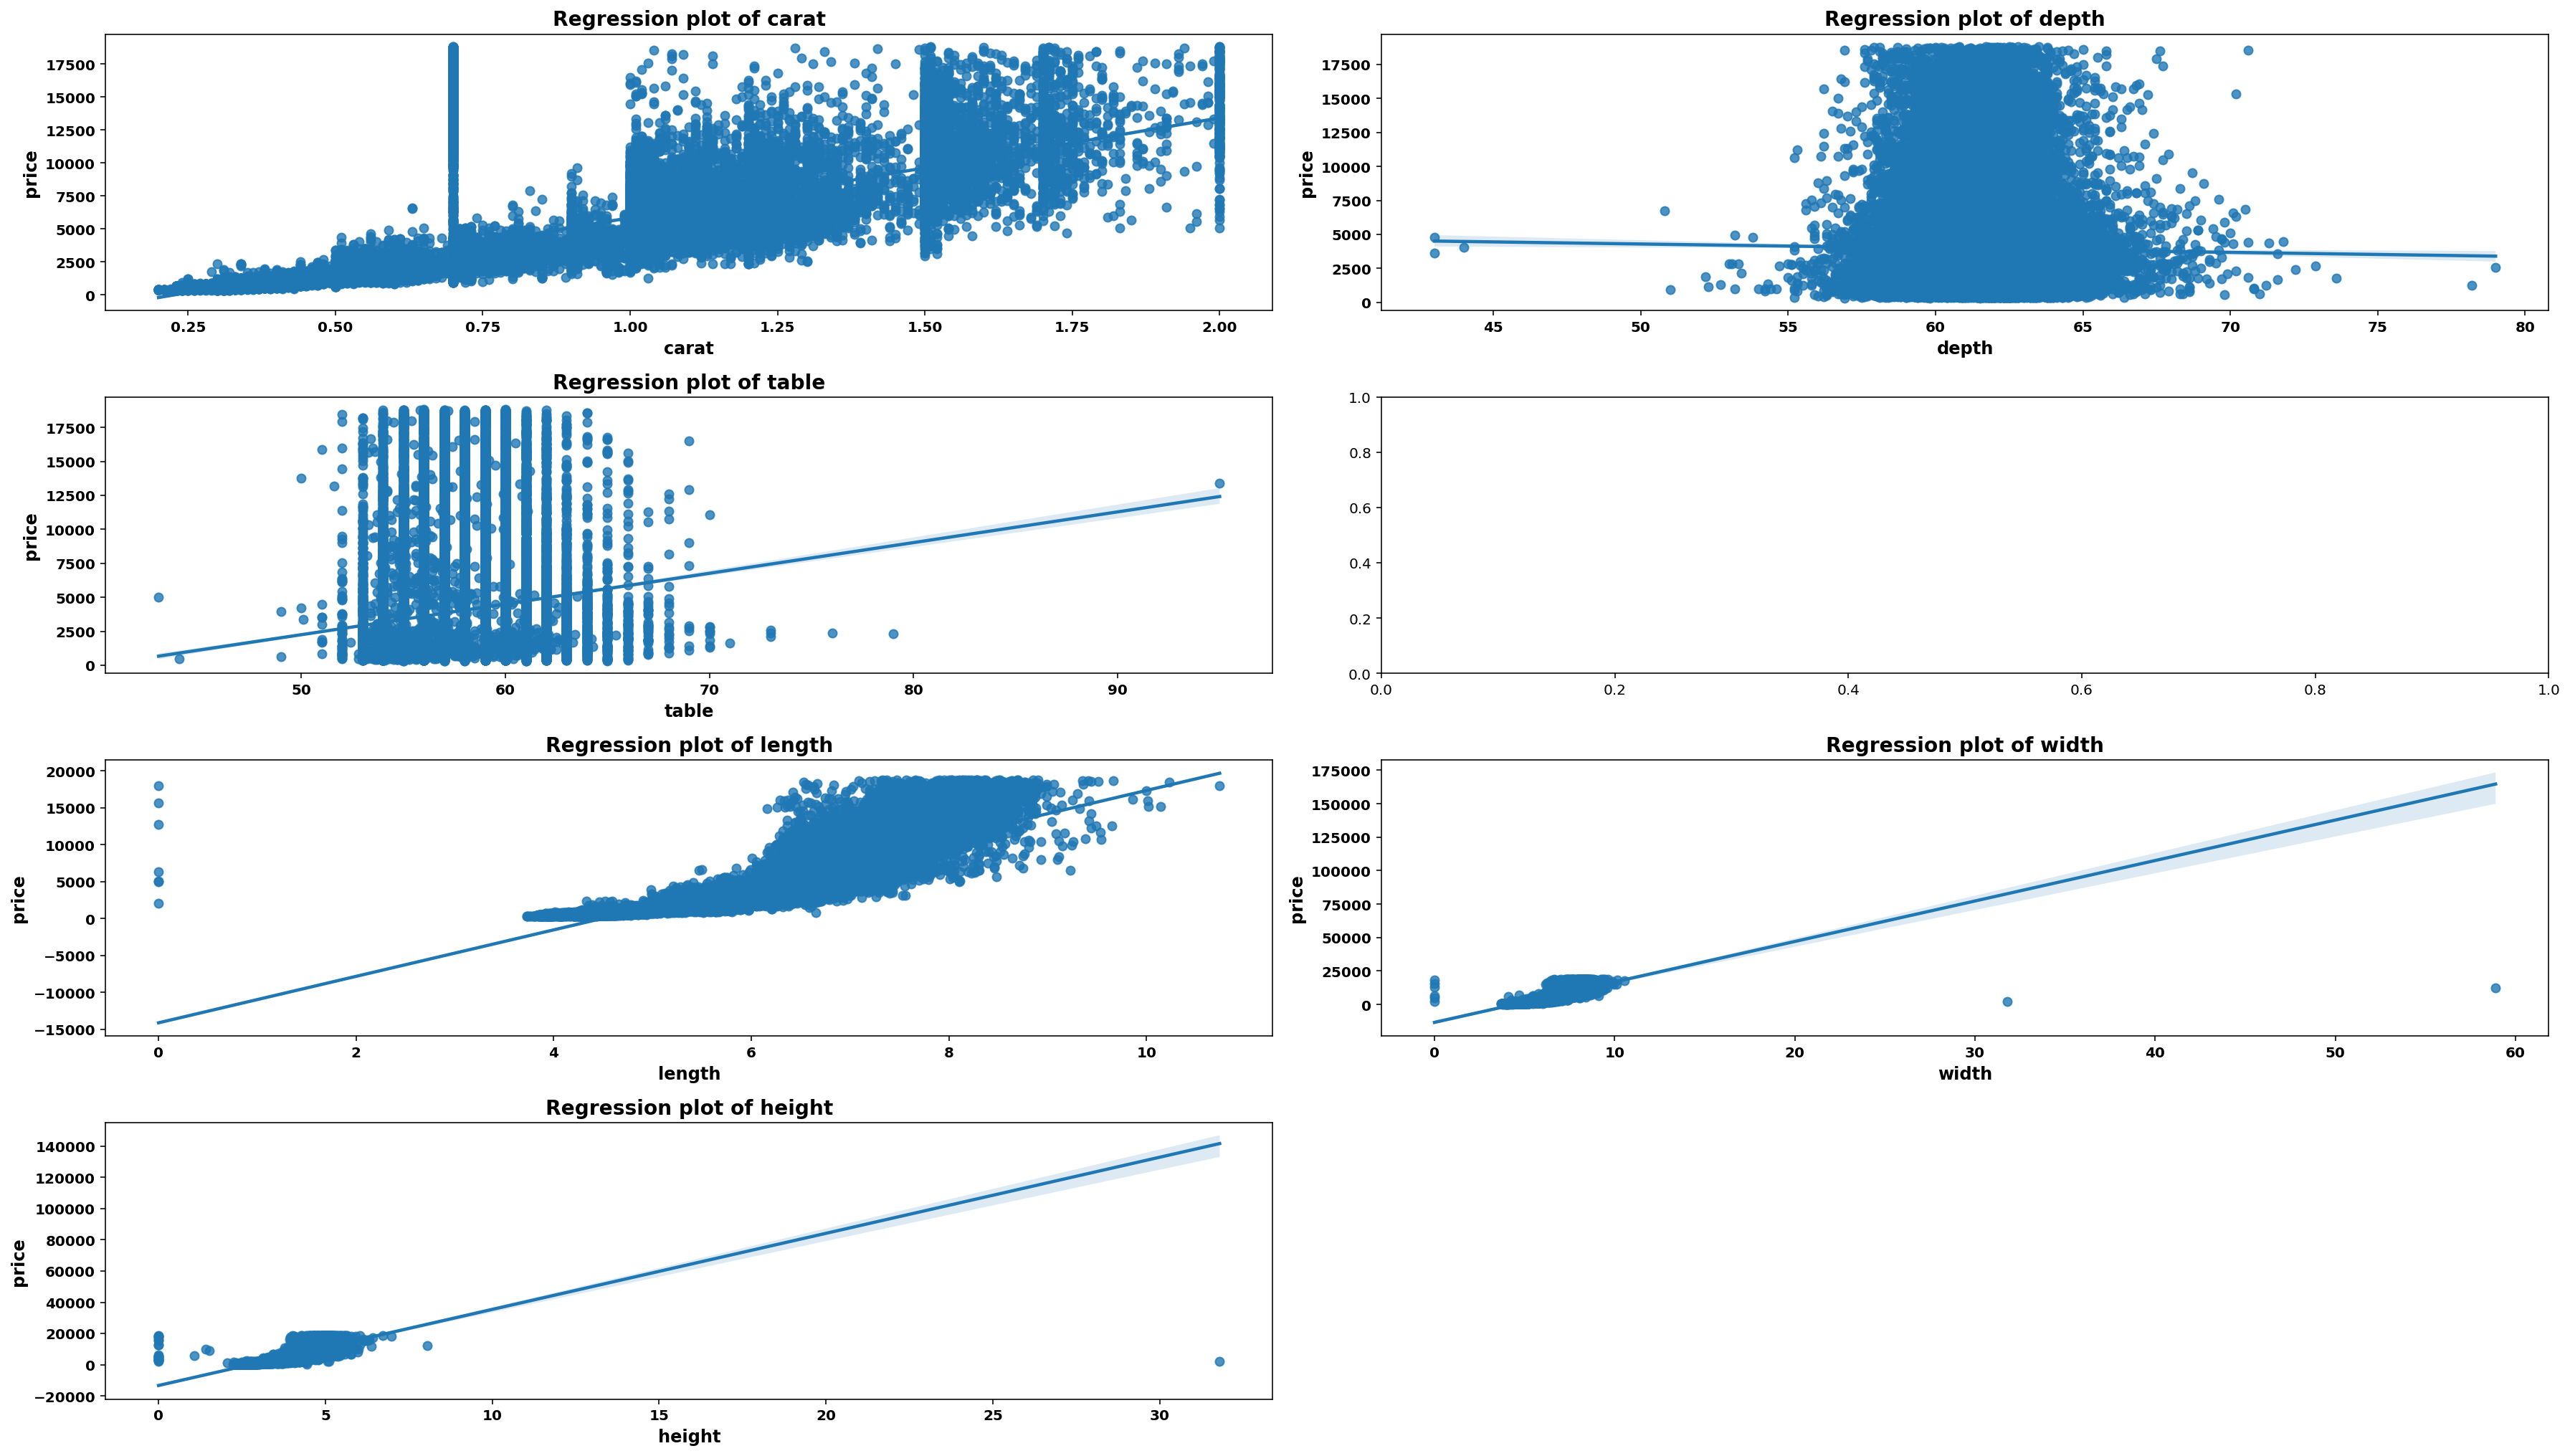

In [1171]:
# calling the function to plot the reg plot
reg_plot()

---
- `Price` and carat column almost follows a linear combination however, price also have some exterem values.
- `Length, width and height` columns are also forms somehow linear combination with the `price`
---


### **Linear Fit**

In [1172]:
# defining dependent and independent variables

# X is our indepedent variable
x = df[['carat', 'depth', 'length', 'width', 'height']] 
# y is our depedent variable
y = df['price']  

----

- We use the columns which are higly correlated like `carat, depth, length, width, height` as our independent variables and `price` column as our dependent variable

---

In [1173]:
# applying train test split and spliting the data into 80, 20 ratio.

# 80% used for training
# and 20% used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


----
- before fitting the data we divided into 80, 20 ratio. 80% is used to train the model and 20% of the data is used to predict the model

----

### **Linear Regression**

In [1201]:
# definig a function to fit and predict the model and printing evaluation metric and printing the co-efficients

def linear_model():
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # Print coefficients for each feature
    print("Model Coefficients:")
    
    for feature, coef in zip(x.columns, model.coef_):
        print(f"Coefficient for {feature}: {coef:.2f}")
    
    print(f"\n Intercept (b): {model.intercept_:.2f}")
        
    # Make predictions on the test set
    y_pred = model.predict(x_test)
        
    # Evaluate the model performance
    r2 = r2_score(y_test, y_pred)  # R-squared
        
    print("\n **Model Performance**")
    print(f"R-squared (R2) on test data: {r2:.2f}")

    return

In [ ]:
# calling the function
linear_model()

Model Coefficients:
Coefficient for carat: -1111.34
Coefficient for depth: 1.24
Coefficient for length: 2874.80
Coefficient for width: 168.28
Coefficient for height: 738.44

 Intercept (b): -15360.60

📈 **Model Performance**
R-squared (R2) on test data: 0.78


----
- The R-Square of our model on unseen testing data is 0.78 which is quite impressive. That shows our model is performing realy well.

---

In [1197]:
# def a function to plot the best fit line
def best_fit_line():
    '''
    The best fit line
    '''
    # Plot best-fitted line on test data
    # defining the fgure dpi 
    plt.figure(dpi=144)
    # plotting the scatter plot of predicted vs actual data points
    plt.scatter(y_test, y_pred, color='purple', alpha=0.6, label='Predicted vs. Actual')
    # plotting the best fit line
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit (y = x)')
    
    # Formatting the x and y label and ticks
    plt.xlabel('Actual Price (y_test)', fontsize=12, fontweight='bold')
    plt.ylabel('Predicted Price (y_pred)', fontsize=12, fontweight='bold')
    plt.title('Actual vs. Predicted Prices (Test Data)', fontsize=12, fontweight='bold')
    plt.ylim(-1300, 20500)
    # adding legend
    plt.legend()
    # line style
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return


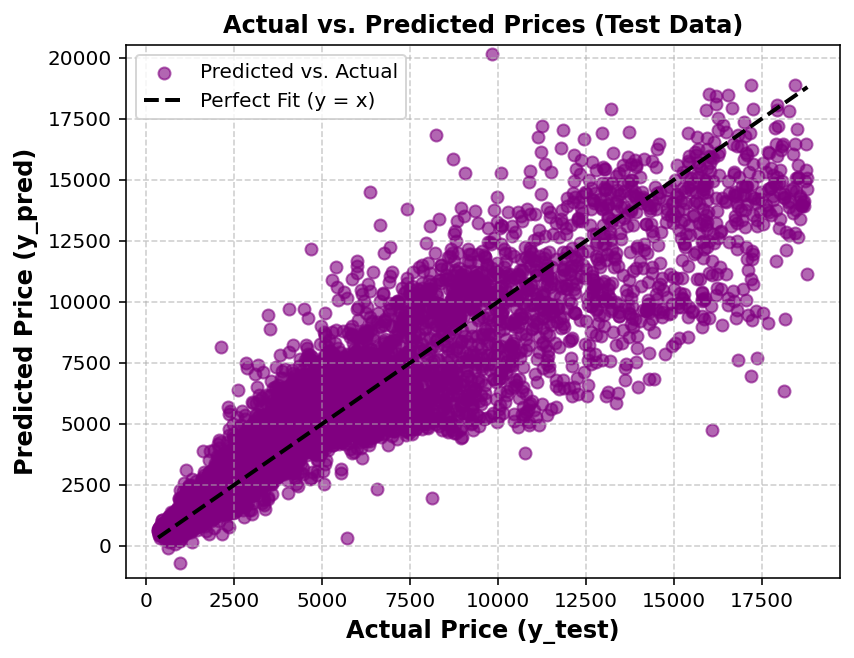

In [ ]:
# plotting the best fit line
best_fit_line()